Image shape: (4284, 5712, 3)
Image dtype: uint8
✅ Blurred version created
Gause param: [0.00, 255.00]
Diff range: [-186.00, 205.00]
✅ Sharpened with amount=0.5
✅ Sharpened with amount=1.0
✅ Sharpened with amount=2.0
✅ Sharpened with amount=3.0


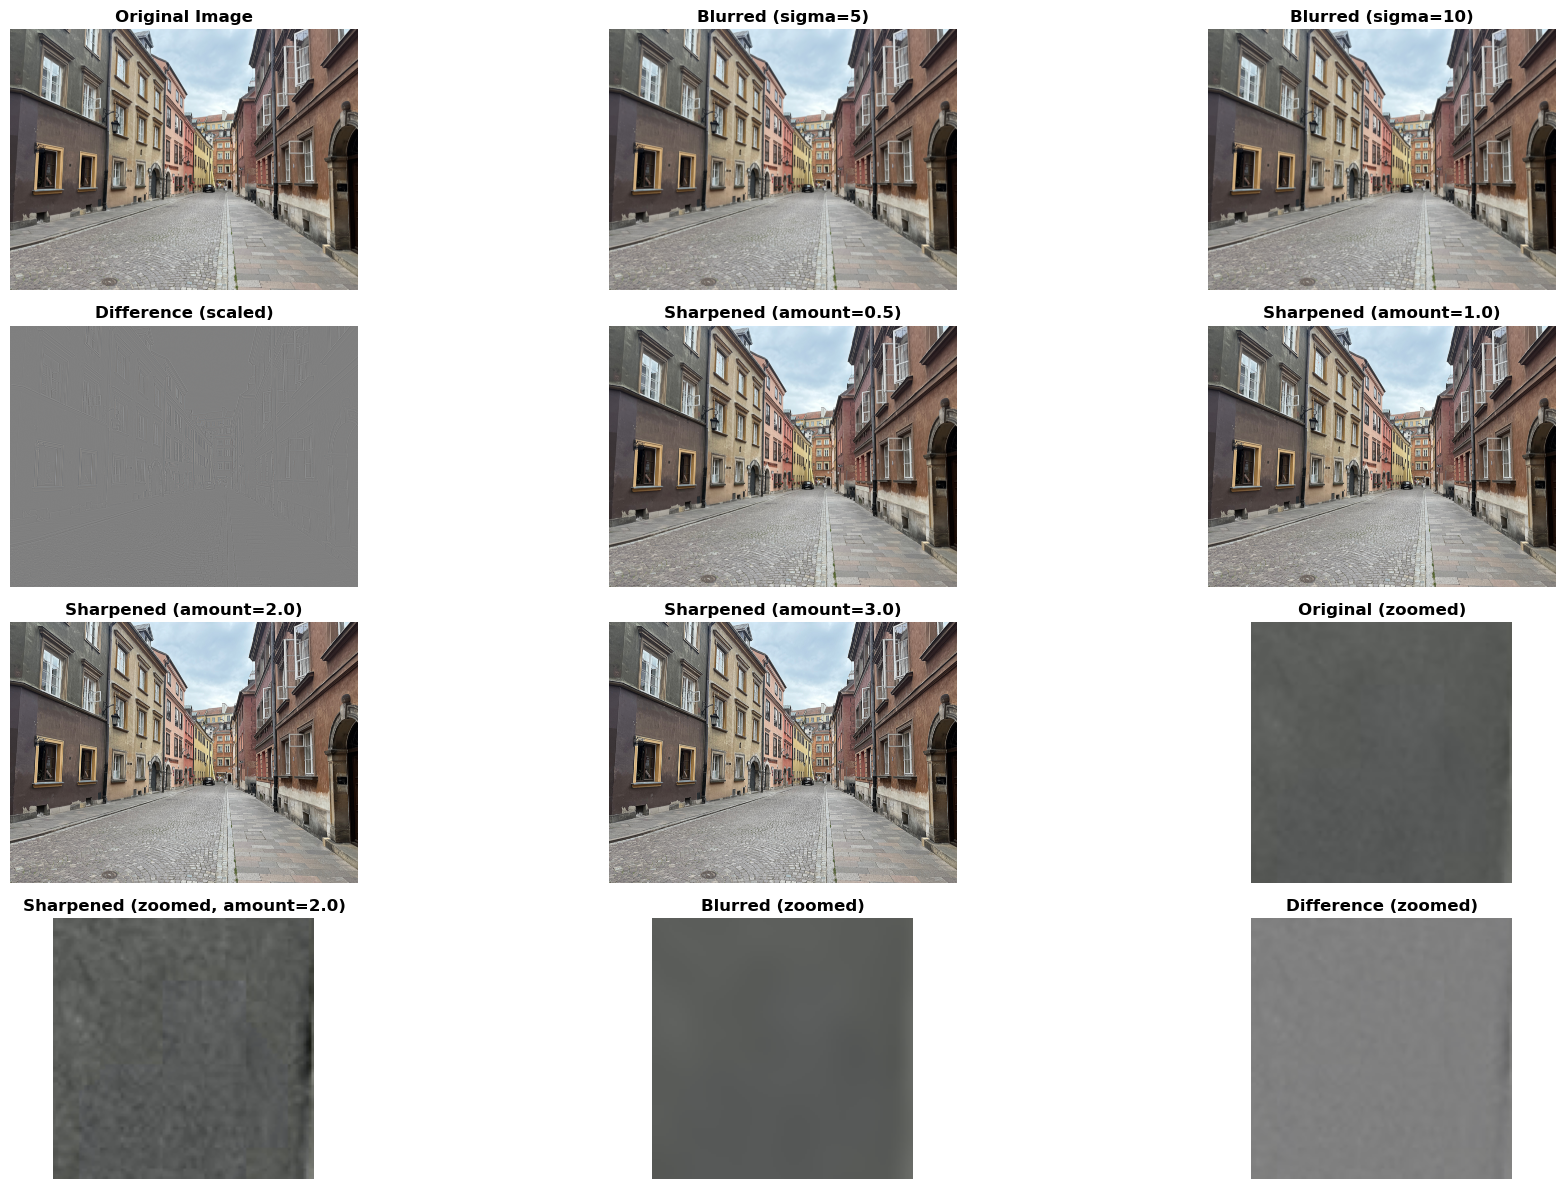


✅ Unsharp Masking completed!


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

img = cv2.imread('data/IMG_3958.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")

# ===== STEP 1: Create a blurred (unsharp) version =====
unsharp = cv2.GaussianBlur(img, (15, 15), 5)
print("✅ Blurred version created")

# ===== STEP 2: Create the difference image =====
img_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)
diff = img_float - unsharp_float

# Unsharp by Gaussian blur with different parameters
unsharp_gause_b = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=10)
print(f"Gause param: [{unsharp_gause_b.min():.2f}, {unsharp_gause_b.max():.2f}]")
print(f"Diff range: [{diff.min():.2f}, {diff.max():.2f}]")

# ===== STEP 3: Apply USM with different amounts =====
amounts = [0.5, 1.0, 2.0, 3.0]
sharpened_images = []

for amount in amounts:
    sharpened = img_float + diff * amount
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    sharpened_images.append(sharpened)
    print(f"✅ Sharpened with amount={amount}")

# ===== VISUALIZATION =====
# Using consistent 4x3 grid (12 subplots total)

plt.subplot(4, 3, 1)
plt.imshow(img)
plt.title('Original Image', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(4, 3, 2)
plt.imshow(unsharp)
plt.title('Blurred (sigma=5)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(4, 3, 3)
plt.imshow(unsharp_gause_b)
plt.title('Blurred (sigma=10)', fontsize=12, fontweight='bold')
plt.axis('off')

# Visualize the difference
diff_vis = np.clip(diff + 128, 0, 255).astype(np.uint8)
plt.subplot(4, 3, 4)
plt.imshow(diff_vis)
plt.title('Difference (scaled)', fontsize=12, fontweight='bold')
plt.axis('off')

# Show sharpened versions with different amounts
for idx, (amount, sharpened) in enumerate(zip(amounts, sharpened_images), start=5):
    plt.subplot(4, 3, idx)
    plt.imshow(sharpened)
    plt.title(f'Sharpened (amount={amount})', fontsize=12, fontweight='bold')
    plt.axis('off')

# Add zoom comparison for detail
zoom_y, zoom_x = 200, 150
zoom_size = 100

plt.subplot(4, 3, 9)
zoomed_original = img[zoom_y:zoom_y+zoom_size, zoom_x:zoom_x+zoom_size]
plt.imshow(zoomed_original)
plt.title('Original (zoomed)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(4, 3, 10)
zoomed_sharp = sharpened_images[2][zoom_y:zoom_y+zoom_size, zoom_x:zoom_x+zoom_size]
plt.imshow(zoomed_sharp)
plt.title(f'Sharpened (zoomed, amount=2.0)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(4, 3, 11)
zoomed_blur = unsharp[zoom_y:zoom_y+zoom_size, zoom_x:zoom_x+zoom_size]
plt.imshow(zoomed_blur)
plt.title('Blurred (zoomed)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.subplot(4, 3, 12)
zoomed_diff = diff_vis[zoom_y:zoom_y+zoom_size, zoom_x:zoom_x+zoom_size]
plt.imshow(zoomed_diff)
plt.title('Difference (zoomed)', fontsize=12, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Unsharp Masking completed!")

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<Axes: >, <matplotlib.image.AxesImage at 0x167e7d8a0>)

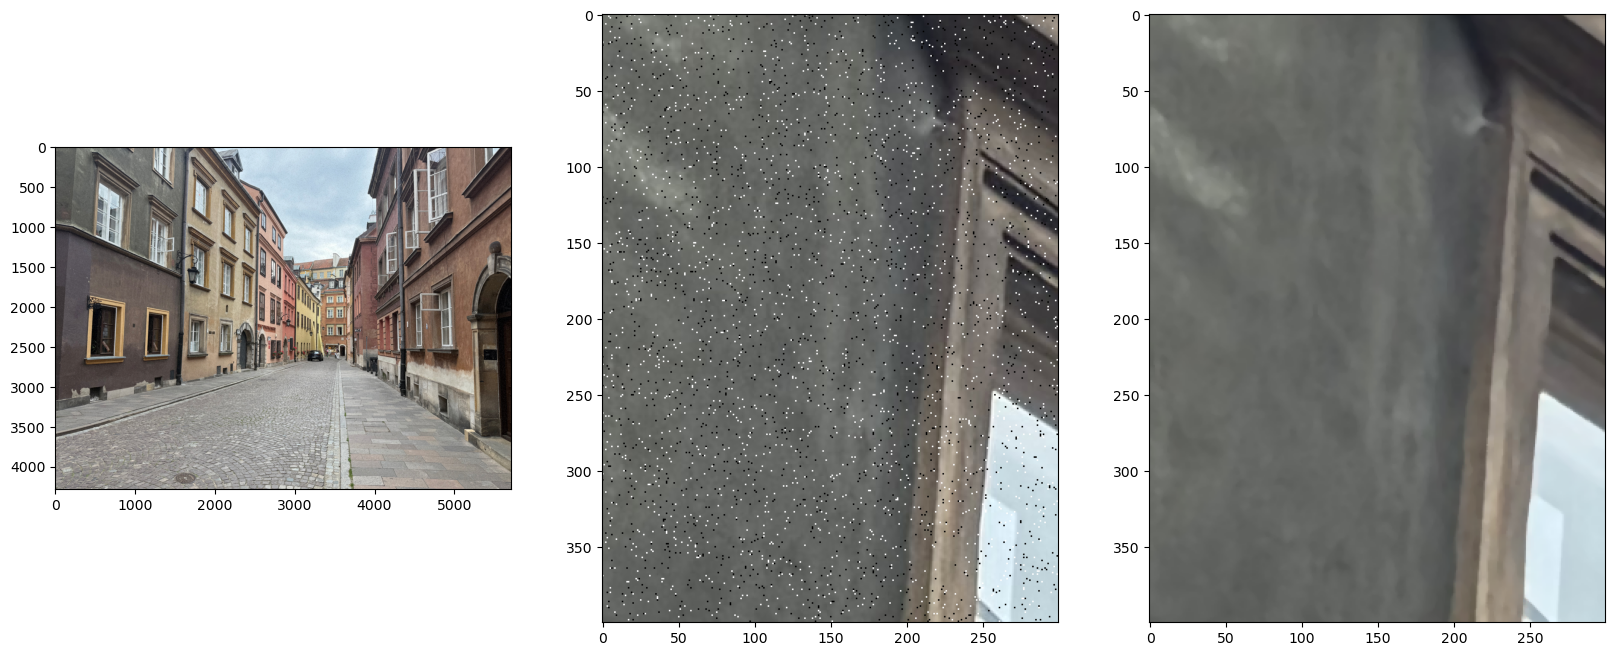

In [3]:
noisy = np.zeros_like(img)
rows, cols, _ = img.shape

probability = 0.03
for r in range(rows):
    for c in range(cols):
        if np.random.rand() < probability:
            # 50% chance of getting salt or pepper
            if np.random.rand() < 0.5:
                noisy[r, c, :] = 255
            else:
                noisy[r, c, :] = 0
        else:
            noisy[r, c, :] = img[r, c, :]
            
plt.subplot(131), plt.imshow(noisy)
median = cv2.medianBlur(noisy, ksize=5)

plt.subplot(132), plt.imshow(noisy[200:600, 300:600, :])
plt.subplot(133), plt.imshow(median[200:600, 300:600, :])

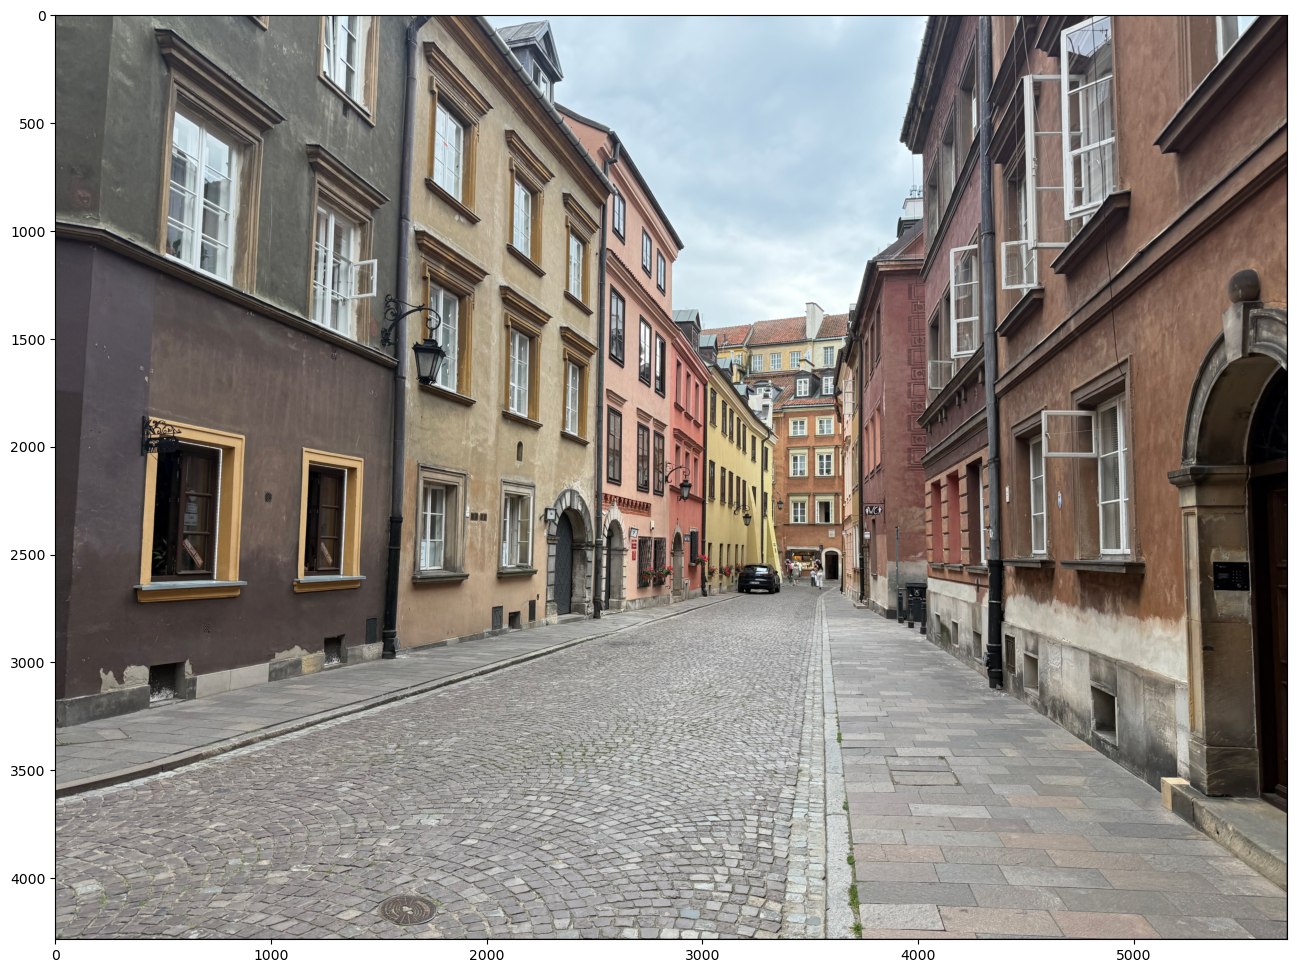

In [4]:
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
rows, cols, channels = img.shape
out = np.zeros_like(img)

# Sliding window applied to each colour channel
for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        for ch in range(0, channels):
            block = img[r-1:r+2, c-1:c+2, ch]
            out[r, c, ch] = np.sum(block * kernel)
            
plt.imshow(out)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


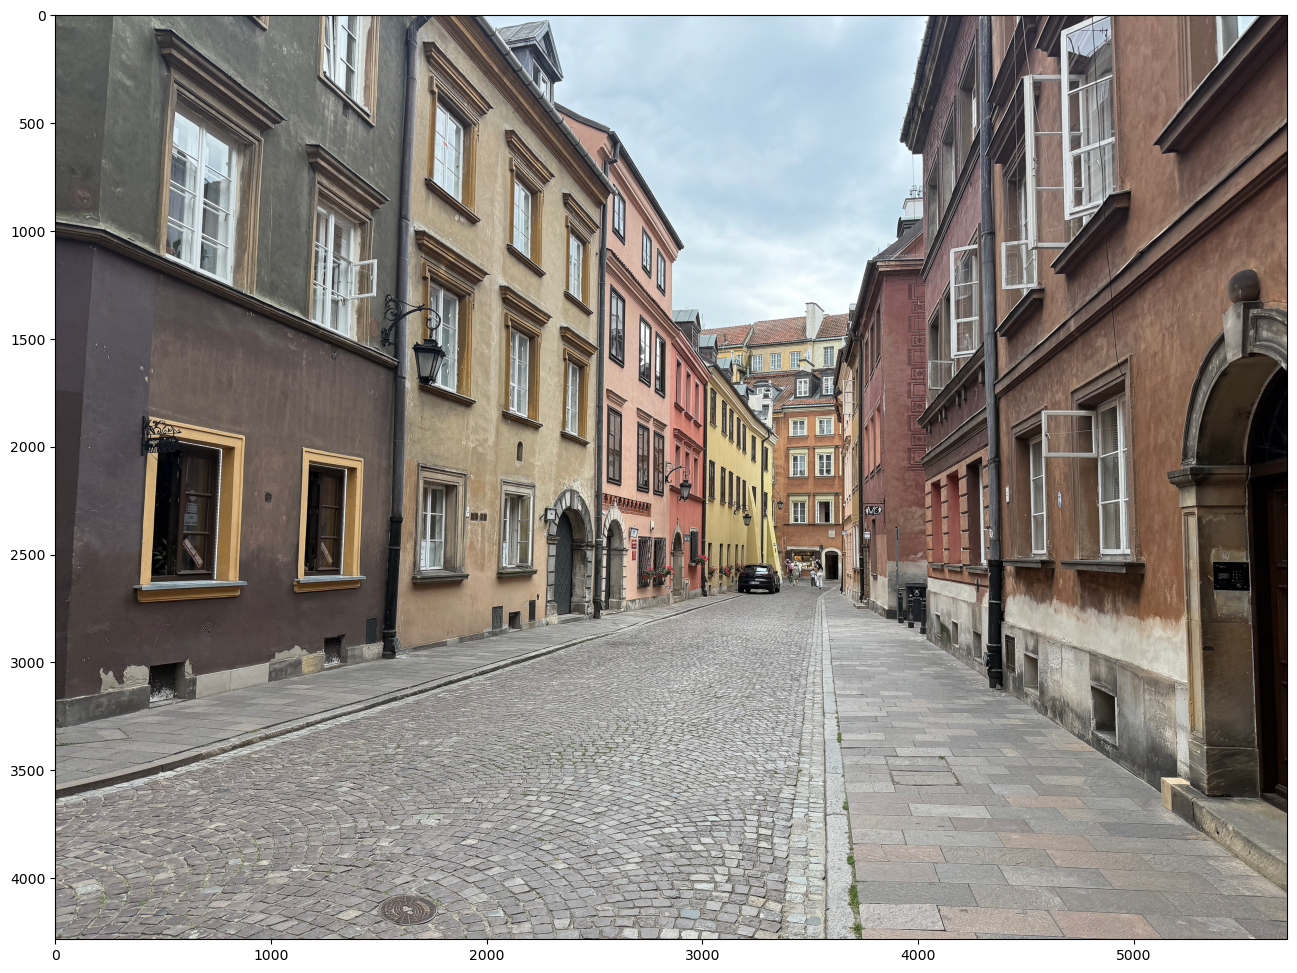

In [5]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
out = cv2.filter2D(img, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
plt.imshow(out)
print(kernel)

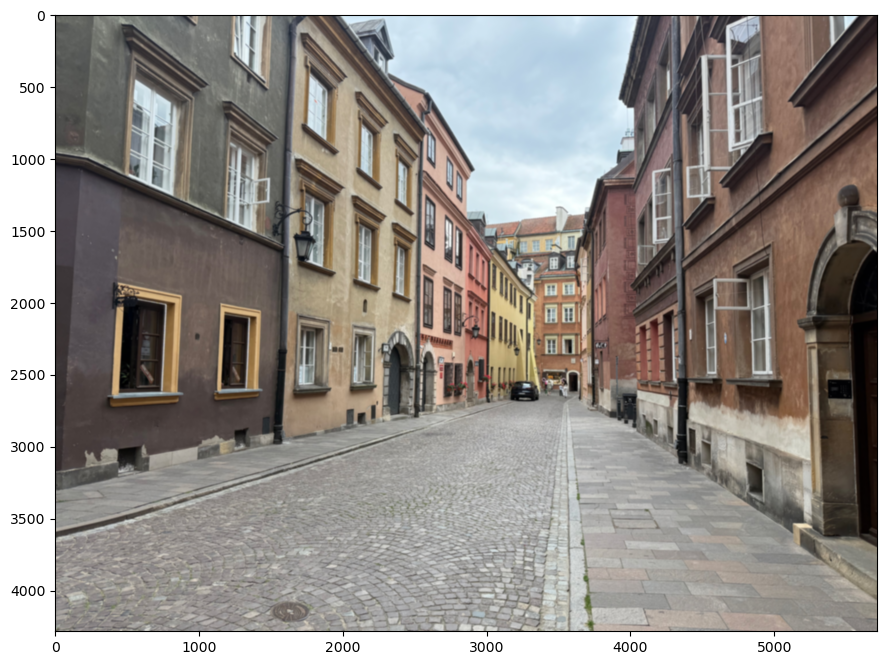

In [12]:
# Or even simpler for predefined filters
out = cv2.GaussianBlur(img, ksize=(15,15), sigmaX=5)
plt.imshow(out)

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
plt.rcParams['figure.figsize'] = [20, 8]


img = cv2.imread('data/IMG_3958.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def apply_usm(amount=1.5, kernel_size=15, sigma=5.0):
    """
    Apply Unsharp Masking with adjustable parameters
    
    amount: Sharpening intensity (0.0 - 5.0)
    kernel_size: Gaussian blur kernel size (must be odd: 3, 5, 7, ..., 31)
    sigma: Gaussian blur sigma (0.1 - 20.0)
    """
    # Ensure kernel_size is odd
    if kernel_size % 2 == 0:
        kernel_size += 1
    
    # Create blurred version
    unsharp = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
    
    # Convert to float
    img_float = img.astype(np.float32)
    unsharp_float = unsharp.astype(np.float32)
    
    # Calculate difference
    diff = img_float - unsharp_float
    
    # Apply USM
    sharpened = img_float + diff * amount
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    # Visualize difference (scaled)
    diff_vis = np.clip(diff + 128, 0, 255).astype(np.uint8)
    
    # Display results
    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title('Original', fontsize=14, fontweight='bold')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(unsharp)
    plt.title(f'Blurred\n(kernel={kernel_size}, σ={sigma:.1f})', fontsize=14, fontweight='bold')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(diff_vis)
    plt.title('Difference', fontsize=14, fontweight='bold')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(sharpened)
    plt.title(f'Sharpened\n(amount={amount:.1f})', fontsize=14, fontweight='bold')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Parameters: amount={amount:.1f}, kernel={kernel_size}, sigma={sigma:.1f}")
    print(f"📈 Diff range: [{diff.min():.2f}, {diff.max():.2f}]")

# Create interactive sliders
interact(
    apply_usm,
    amount=FloatSlider(
        min=0.0, max=5.0, step=0.1, value=1.5,
        description='Amount:',
        style={'description_width': '100px'}
    ),
    kernel_size=IntSlider(
        min=3, max=31, step=2, value=15,
        description='Kernel Size:',
        style={'description_width': '100px'}
    ),
    sigma=FloatSlider(
        min=0.1, max=20.0, step=0.5, value=5.0,
        description='Sigma:',
        style={'description_width': '100px'}
    )
)

interactive(children=(FloatSlider(value=1.5, description='Amount:', max=5.0, style=SliderStyle(description_wid…

<function __main__.apply_usm(amount=1.5, kernel_size=15, sigma=5.0)>